**Replicated from**: *Alura* online course.<br>
**Author of the educational material**: Sthefanie Monica Premebida.<br>
**Original name**: Visão Computacional: reconhecimento de texto com OCR and OpenCV. <br>
**Translation**: Computer Vision: text recognition with OCR and OpenCV.<br>
**Link to the online course**: https://cursos.alura.com.br/formacao-visao-computacional-opencv)


# **Preparing the environment**

We will obtain the data directly from GitHub and make use of the Pytesseract package to utilize the Tesseract OCR software, which is available for free.

In [ ]:
!pip install opencv-python==4.6.0
!sudo apt install tesseract-ocr
!pip install pytesseract==0.3.9

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement opencv-python==4.6.0 (from versions: 3.4.0.14, 3.4.10.37, 3.4.11.39, 3.4.11.41, 3.4.11.43, 3.4.11.45, 3.4.13.47, 3.4.14.51, 3.4.14.53, 3.4.15.55, 3.4.16.57, 3.4.16.59, 3.4.17.61, 3.4.17.63, 3.4.18.65, 4.3.0.38, 4.4.0.40, 4.4.0.42, 4.4.0.44, 4.4.0.46, 4.5.1.48, 4.5.2.52, 4.5.2.54, 4.5.3.56, 4.5.4.58, 4.5.4.60, 4.5.5.62, 4.5.5.64, 4.6.0.66, 4.7.0.68, 4.7.0.72)
ERROR: No matching distribution found for opencv-python==4.6.0
Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2build2).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Importing the packages:

In [ ]:
import pytesseract
import numpy as np
import cv2 
from google.colab.patches import cv2_imshow #show images in Google Colab

We will be using the command "!git clone" to import the data directly from a GitHub repository:

In [ ]:
! git clone https://github.com/sthemonica/text-recognize

fatal: destination path 'text-recognize' already exists and is not an empty directory.


# **Initial tests**

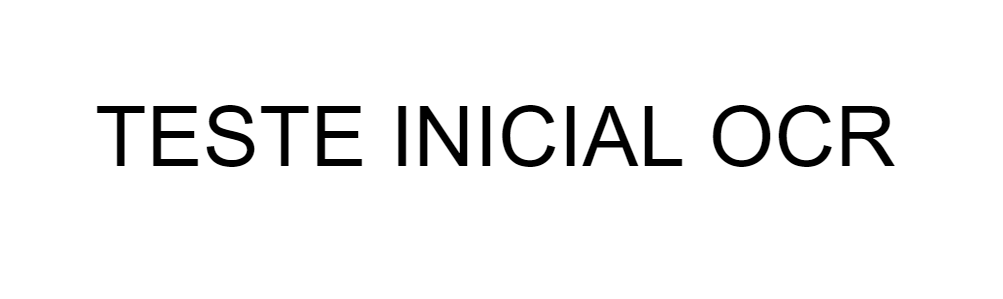

In [ ]:
img = cv2.imread("/content/text-recognize/Imagens/Aula1-teste.png")
cv2_imshow(img)

In [ ]:
texto = pytesseract.image_to_string(img)
print(texto)

TESTE INICIAL OCR



BGR Images

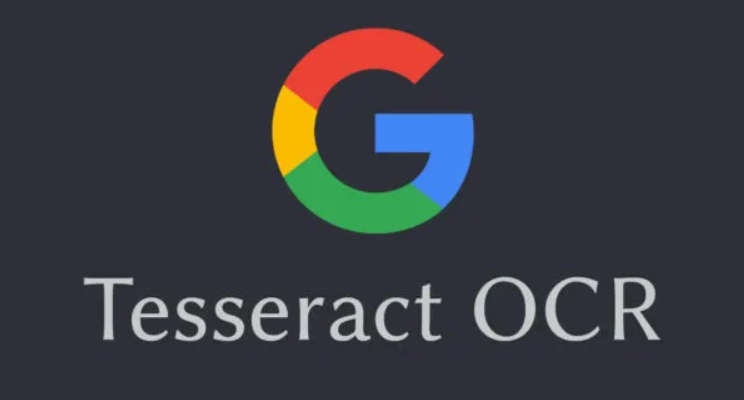

In [ ]:
img = cv2.imread("/content/text-recognize/Imagens/Aula1-ocr.png")
cv2_imshow(img)

OpenCV has inverted colors in its channels, so a conversion to RGB is necessary to interact with other packages.

Conversion to RGB:

```
# This is formatted as code
```



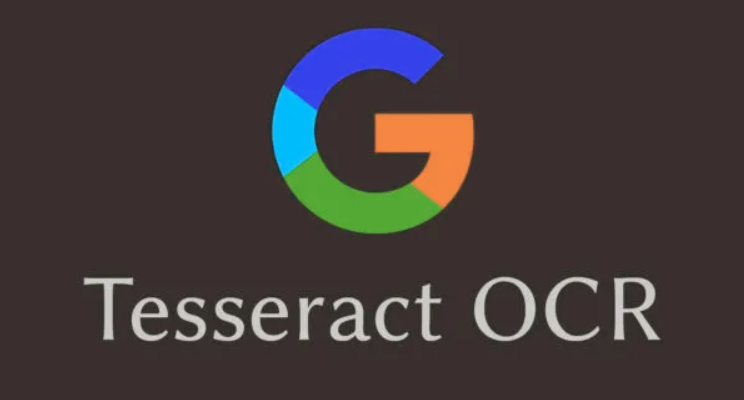

In [ ]:
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
cv2_imshow(rgb)

Conversion to gray scale:

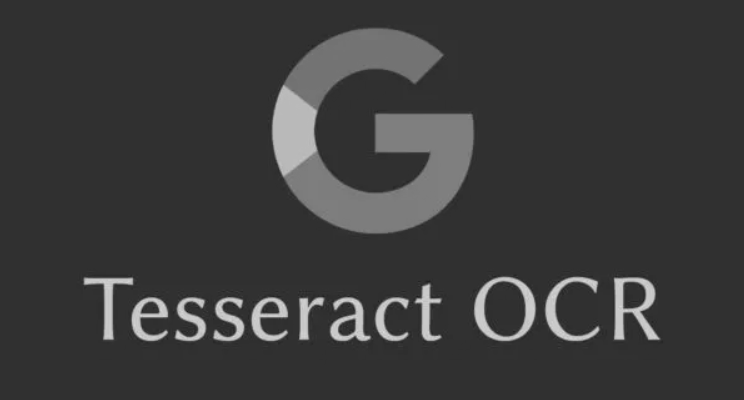

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # OpenCV has inverted colors in its channels, so a conversion to RGB is necessary to interact with other packages.
cv2_imshow(gray)

Testing the recognition of text:

In [ ]:
texto = pytesseract.image_to_string(rgb)
print(texto)

c

Tesseract OCR



In [ ]:
texto = pytesseract.image_to_string(gray)
print(texto)

C

Tesseract OCR



Utilizing more complex texts:

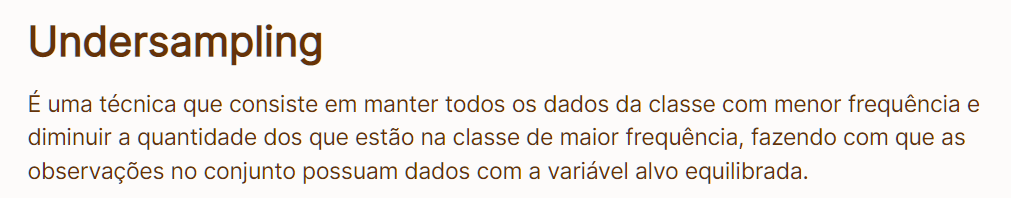

In [ ]:
img = cv2.imread("/content/text-recognize/Imagens/Aula2-undersampling.png")
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
cv2_imshow(rgb)

In [ ]:
texto = pytesseract.image_to_string(rgb)
print(texto)

Undersampling

E uma técnica que consiste em manter todos os dados da classe com menor frequéncia e
diminuir a quantidade dos que estdo na classe de maior frequéncia, fazendo com que as
observagées no conjunto possuam dados com a variavel alvo equilibrada.



It seems that there were errors in the translation. The following line of code displays a list of languages that are available in Tesseract OCR:

In [ ]:
!tesseract --list-langs

List of available languages (3):
eng
osd
por


Installing Portuguese language:

In [ ]:
!apt-get install tesseract-ocr-por

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr-por is already the newest version (1:4.00~git30-7274cfa-1).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.


In [ ]:
!tesseract --list-langs

List of available languages (3):
eng
osd
por


In [ ]:
texto = pytesseract.image_to_string(rgb, lang='por')
print(texto)

Undersampling

É uma técnica que consiste em manter todos os dados da classe com menor frequência e
diminuir a quantidade dos que estão na classe de maior frequência, fazendo com que as
observações no conjunto possuam dados com a variável alvo equilibrada.



# **Put these languages in a folder**

In [ ]:
!mkdir tessdata

mkdir: cannot create directory ‘tessdata’: File exists


In [ ]:
!wget -O ./tessdata/por.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true
!wget -O ./tessdata/eng.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/eng.traineddata?raw=true

--2023-03-27 19:47:04--  https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/tesseract-ocr/tessdata/raw/main/por.traineddata [following]
--2023-03-27 19:47:04--  https://github.com/tesseract-ocr/tessdata/raw/main/por.traineddata
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tesseract-ocr/tessdata/main/por.traineddata [following]
--2023-03-27 19:47:04--  https://raw.githubusercontent.com/tesseract-ocr/tessdata/main/por.traineddata
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awa

In [ ]:
config_tesseract = '--tessdata-dir tessdata'
texto = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(texto)

Undersampling

É uma técnica que consiste em manter todos os dados da classe com menor frequência e
diminuir a quantidade dos que estão na classe de maior frequência, fazendo com que as
observações no conjunto possuam dados com a variável alvo equilibrada.



In [ ]:
!ls tessdata/

eng.traineddata  por.traineddata


# **PSMs - Page Segmentation Modes**

In [ ]:
!tesseract --help-psm

Page segmentation modes:
  0    Orientation and script detection (OSD) only.
  1    Automatic page segmentation with OSD.
  2    Automatic page segmentation, but no OSD, or OCR. (not implemented)
  3    Fully automatic page segmentation, but no OSD. (Default)
  4    Assume a single column of text of variable sizes.
  5    Assume a single uniform block of vertically aligned text.
  6    Assume a single uniform block of text.
  7    Treat the image as a single text line.
  8    Treat the image as a single word.
  9    Treat the image as a single word in a circle.
 10    Treat the image as a single character.
 11    Sparse text. Find as much text as possible in no particular order.
 12    Sparse text with OSD.
 13    Raw line. Treat the image as a single text line,
       bypassing hacks that are Tesseract-specific.


There are 14 modes listed above which tesseract uses for page segmentation:

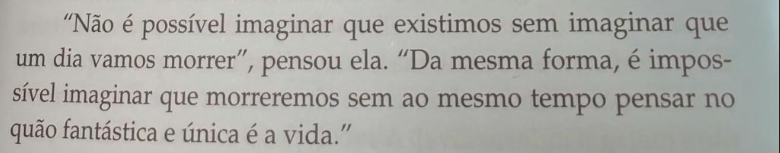

In [ ]:
img = cv2.imread("/content/text-recognize/Imagens/Aula2-trecho-livro.png")
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
cv2_imshow(rgb)

In [ ]:
config_tesseract = "--tessdata-dir tessdata"
texto = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(texto)

“Não é possível imaginar que existimos sem imaginar que
um dia vamos morrer”, pensou ela. “Da mesma forma, é impos-
sível imaginar que morreremos sem ao mesmo tempo pensar no
quão fantástica e única é a vida.”



It seems good, but what type of *page segmentation mode* (psm) is this? Let's try the psm nº6 from the last list. Repeat the last code and add "-- psm 6" in the *config*:

In [ ]:
config_tesseract = "--tessdata-dir tessdata --psm 6" # <- here
texto = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(texto)

“Não é possível imaginar que existimos sem imaginar que
um dia vamos morrer”, pensou ela. “Da mesma forma, é impos-
sível imaginar que morreremos sem ao mesmo tempo pensar no
quão fantástica e única é a vida.”



Same result as before. Let's check other types. <br>
psm "7-Treat the image as a single text line."


In [ ]:
config_tesseract = "--tessdata-dir tessdata --psm 7" 
texto = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(texto)

No answer. Let's try another one.<br>
psm "8-Treat the image as a single word."

In [ ]:
config_tesseract = "--tessdata-dir tessdata --psm 8" 
texto = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(texto)

ªfâ%êããããââª%%?ªííÉ:D;Z:Én:gíríãrgâgíie::ugfâ|



This is definitely a wrong psm to use for this case.

-----------------

Let's try another text style:

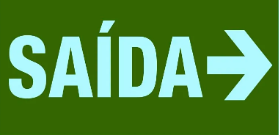

In [ ]:
img = cv2.imread("/content/text-recognize/Imagens/Aula2-Saida.png")
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
cv2_imshow(rgb)

In [ ]:
config_tesseract = "--tessdata-dir tessdata --psm 7" 
texto = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(texto)

SAÍDAS



He misinterpreted the 'arrow' as the letter 'S'

# **Aplicando o PSM**

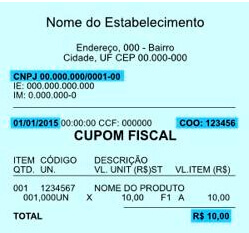

In [ ]:
## Importando a imagem 
img = cv2.imread('/content/text-recognize/Atividades/Aula2-Nota_Fiscal.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)

In [ ]:
config_tesseract = '--tessdata-dir tessdata --psm 4'
texto = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(texto)

Nome do Estabelecimento

Endereço, 090 - Bairro,
(cidade. UF CEP 00.000-000

100:00 CCfF: 000000

CUPOM FISCAL
mEM cóDIGO — DESCRIÇÃO
m. UN VCUNTIRSIST VLTEM(RS)

1001 1234667 — NOMEDO PRODUTO
OOOOOUN Xó 1000 FLA — 1000

ToraL Fs



# **PIL - Python Imaging Library**

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

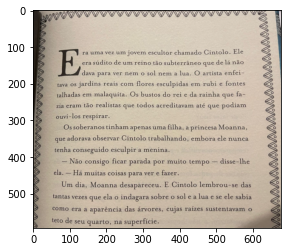

In [ ]:
img = Image.open("/content/text-recognize/Imagens/Aula2-livro.png")
plt.imshow(img);

Let's get some information from this image (metadata) using the following method:. 
```
pytesseract.image_to_osd()
```
OSD means *Orientation and Script Detection*.

In [ ]:
print(pytesseract.image_to_osd(img))

Page number: 0
Orientation in degrees: 0
Rotate: 0
Orientation confidence: 0.93
Script: Latin
Script confidence: 2.46



With the module Image we can modify the image. For example, rotating 45 degrees:

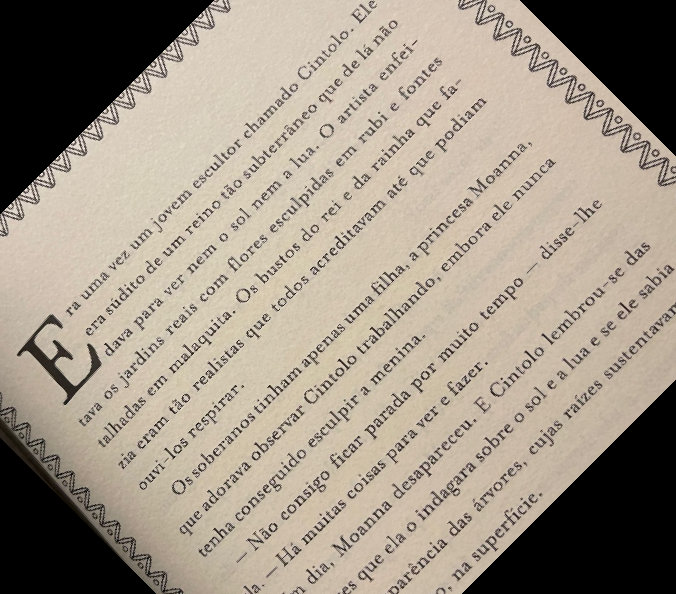

In [ ]:
from PIL import Image
with img as im:
    im.rotate(45).show()

Testing a manuscript text with different colors and capital letters.

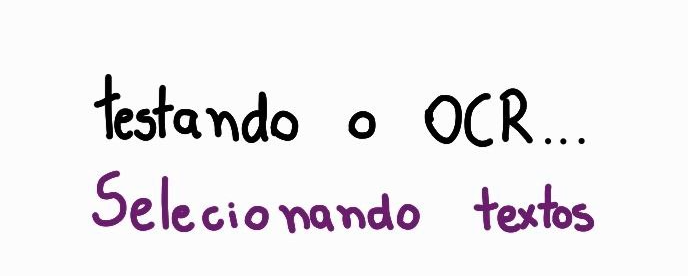

In [ ]:
img = cv2.imread("/content/text-recognize/Imagens/Aula3-testando.png")
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb);

Importing the Output method:

In [ ]:
from pytesseract import Output

In [ ]:
config_tesseract = '--tessdata-dir tessdata'
result = pytesseract.image_to_data(rgb, lang='por', config=config_tesseract, output_type=Output.DICT)
result

{'level': [1, 2, 3, 4, 5, 5, 5, 4, 5, 5],
 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'block_num': [0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'par_num': [0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
 'line_num': [0, 0, 0, 1, 1, 1, 1, 2, 2, 2],
 'word_num': [0, 0, 0, 0, 1, 2, 3, 0, 1, 2],
 'left': [0, 92, 92, 94, 94, 348, 425, 92, 92, 474],
 'top': [0, 74, 74, 74, 74, 111, 88, 171, 171, 184],
 'width': [688, 502, 502, 491, 204, 28, 160, 502, 328, 120],
 'height': [276, 159, 159, 73, 69, 28, 59, 62, 62, 49],
 'conf': ['-1', '-1', '-1', '-1', 63, 90, 48, '-1', 85, 77],
 'text': ['',
  '',
  '',
  '',
  'Testando',
  'o',
  'OCR..',
  '',
  'Selecionando',
  'textos']}

What is what?:
* block_num = current block number.
* conf = confidence of the prediction (from 0 to 100. -1 means that no text was * recognized)
* height = height of the detected text block (i.e. bounding box)
* left = the x coordinate where the bounding box starts.
* level = the level corresponding to the category of the detected block. There are 5 possible values: 1. page; 2. block; 3. paragraph; 4. line; and 5. word.
* line_num = the line number of the one detected (starts with 0)
* page_num = index of the page where the tiem was detected. In most cases there will always be only one page.
* text = recognition result
* top = y coordinate where the bounding box starts.
* width = width of the current detected text block.
* word_num = word number (index) within the current block.

Let's define the minimum of confidence to 40.

In [ ]:
min_conf = 40 #@param {type: 'slider', min: 0, max: 100}

**Bounding Box** <br>
We will define the bounding box around the region of interest in our image.

In [ ]:
def bbox(result, img, cor = (255, 100, 0)): #BGR
  x = result['left'][i]
  y = result['top'][i]
  w = result['width'][i]
  h = result['height'][i]

  cv2.rectangle(img, (x, y), (x, y), cor, 2) # image, initial point, final point, color, thickness (borda)

  return x, y, img

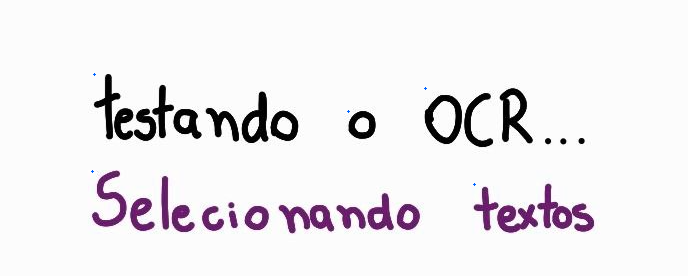

In [ ]:
img_copia = rgb.copy()
qtd_text = len(result['text'])

for i in range(qtd_text):
  confidence = int(result['conf'][i])
  if confidence > min_conf:
    x, y, img = bbox(result, img_copia)
cv2_imshow(img_copia)

We just need to correct an important detail. Add the width and height in the function *cv2.rectangle*:

In [ ]:
def bbox(result, img, cor = (255, 100, 0)): #BGR
  x = result['left'][i]
  y = result['top'][i]
  w = result['width'][i]
  h = result['height'][i]

  cv2.rectangle(img, (x, y), (x+w, y+h), cor, 2) # image, initial point, final point, color, thickness (borda)

  return x, y, img

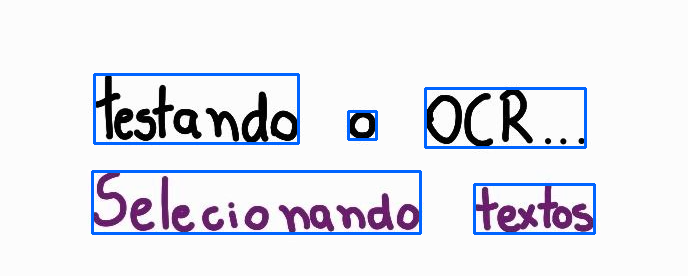

In [ ]:
img_copia = rgb.copy()
qtd_text = len(result['text'])

for i in range(qtd_text):
  confidence = int(result['conf'][i])
  if confidence > min_conf:
    x, y, img = bbox(result, img_copia)
cv2_imshow(img_copia)

**Box and text**

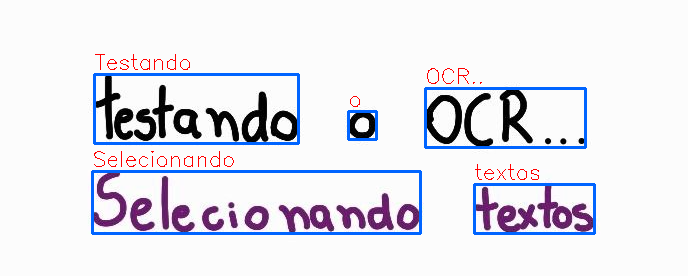

In [ ]:
img_copia = rgb.copy()
qtd_text = len(result['text'])

for i in range(qtd_text):
  confidence = int(result['conf'][i])
  if confidence > min_conf:
    x, y, img = bbox(result, img_copia)
    # adding
    text = result['text'][i]
    cv2.putText(img_copia, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255))

cv2_imshow(img_copia)

**Fonts**

After making all the modifications, we can check if the original picture can be recognized more accurately.

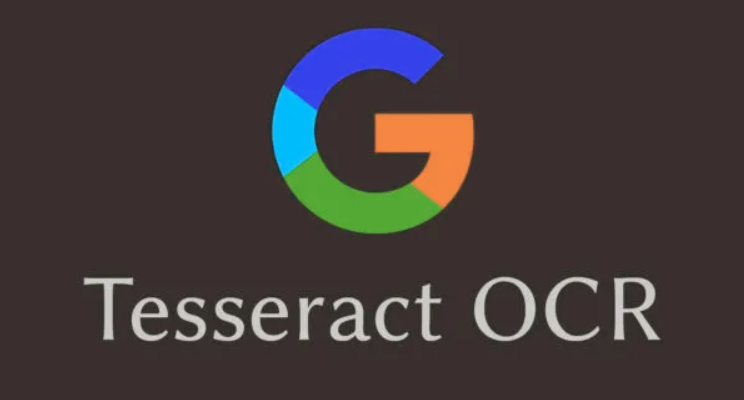

In [ ]:
img = cv2.imread("/content/text-recognize/Imagens/Aula1-ocr.png")
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb);

In [ ]:
config_tesseract = '--tessdata-dir tessdata'
result = pytesseract.image_to_data(rgb, lang='por', config=config_tesseract, output_type=Output.DICT)
result

{'level': [1, 2, 3, 4, 5, 2, 3, 4, 5, 5],
 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'block_num': [0, 1, 1, 1, 1, 2, 2, 2, 2, 2],
 'par_num': [0, 0, 1, 1, 1, 0, 1, 1, 1, 1],
 'line_num': [0, 0, 0, 1, 1, 0, 0, 1, 1, 1],
 'word_num': [0, 0, 0, 0, 1, 0, 0, 0, 1, 2],
 'left': [0, 272, 272, 272, 272, 84, 84, 84, 84, 474],
 'top': [0, 28, 28, 28, 28, 277, 277, 277, 278, 277],
 'width': [744, 202, 202, 202, 202, 576, 576, 576, 357, 186],
 'height': [400, 205, 205, 205, 205, 64, 64, 64, 63, 64],
 'conf': ['-1', '-1', '-1', '-1', 91, '-1', '-1', '-1', 91, 90],
 'text': ['', '', '', '', 'G', '', '', '', 'Tesseract', 'OCR']}

In [ ]:
from PIL import ImageFont, ImageDraw, Image

In [ ]:
font = '/content/text-recognize/Imagens/calibri.ttf'

Function to fonts

In [ ]:
def write_text(text, x, y, img, font, size_text = 32):
  font = ImageFont.truetype(font, size_text)
  img_pil = Image.fromarray(img)
  draw = ImageDraw.Draw(img_pil)
  draw.text((x, y - size_text), text, font = font)
  img = np.array(img_pil)
  return img

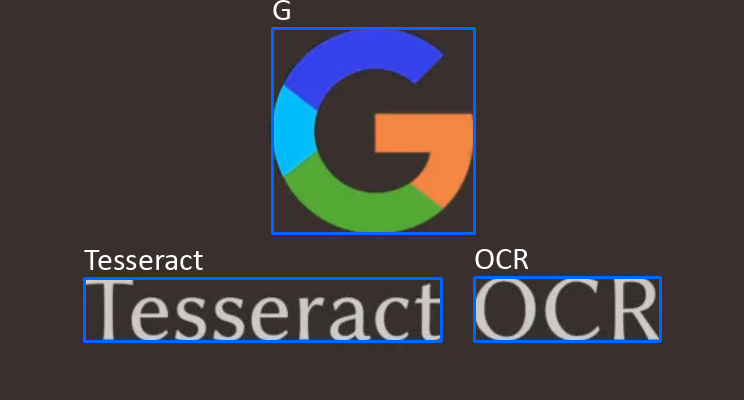

In [ ]:
img_copia = rgb.copy()
qtd_text = len(result['text'])

for i in range(qtd_text):
  confidence = int(result['conf'][i])
  if confidence > min_conf:
    x, y, img = bbox(result, img_copia)
    # adding
    text = result['text'][i]
    #cv2.putText(img_copia, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255))
    img_copia = write_text(text, x, y, img, font)
cv2_imshow(img_copia)

Saving image in a new folder.

In [ ]:
import os
os.makedirs('images_tesseract', exist_ok=True)

In [ ]:
logo_tesseract = '/content/images_tesseract/logo_tesseract.png'

In [ ]:
cv2.imwrite(logo_tesseract, img_copia)

True

# **Complex scenarios**

Searching information

In [ ]:
import re

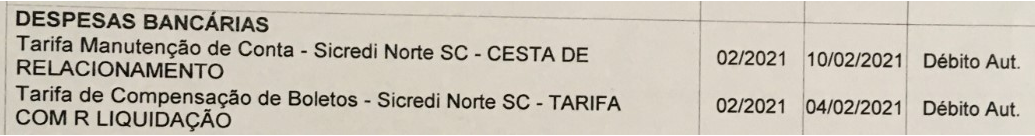

In [ ]:
img = cv2.imread("/content/text-recognize/Imagens/Aula4-tabela_teste.png")
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb);

In [ ]:
config_tesseract = '--tessdata-dir tessdata'
result = pytesseract.image_to_data(rgb, lang='por', config=config_tesseract, output_type=Output.DICT)
result

{'level': [1,
  2,
  3,
  4,
  5,
  5,
  2,
  3,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  4,
  5,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  2,
  3,
  4,
  5,
  5,
  5],
 'page_num': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 'block_num': [0,
  1,
  1,
  1,
  1,
  1,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  3,
  3,
  3,
  3,
  3,
  3],
 'par_num': [0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  

In [ ]:
pattern_date = '^(0[1-9]|[12][0-9]|3[01)/(0[1-9]|1[012])/(19|20)\d\d$'

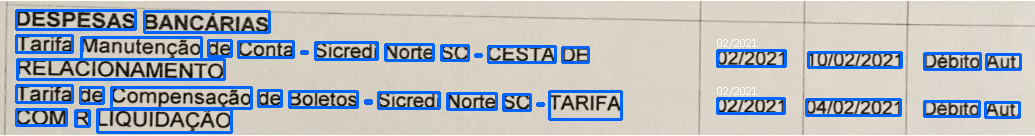

In [ ]:
img_copia = rgb.copy()
qtd_text = len(result['text'])

for i in range(0, qtd_text):
  confidence = int(result['conf'][i])
  if confidence > min_conf:
    text = result['text'][i]
        
    if re.match(pattern_date, text):
      x, y, img = bbox(result, img_copia)
      img_copia = write_text(text, x, y, img_copia, font, 12)
    else:
      x, y, img_copia = bbox(result, img_copia)
cv2_imshow(img_copia)

Highlighting texts

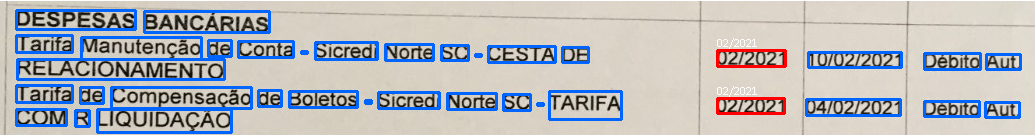

In [ ]:
dates=[]
img_copia = rgb.copy()
qtd_text = len(result['text'])

for i in range(0, qtd_text):
  confidence = int(result['conf'][i])
  if confidence > min_conf:
    text = result['text'][i]
        
    if re.match(pattern_date, text):
      x, y, img = bbox(result, img_copia, (0,0,255))
      img_copia = write_text(text, x, y, img_copia, font, 12)
      dates.append(text)
    else:
      x, y, img_copia = bbox(result, img_copia)
cv2_imshow(img_copia)

In [ ]:
dates

['02/2021', '02/2021']

In the Activities folder within GitHub, you will find the image Lesson4_quote.png and will now apply Regex to highlight all information that contains hour values in the image! Which alternatives result in ALL of the time values highlighted in red?

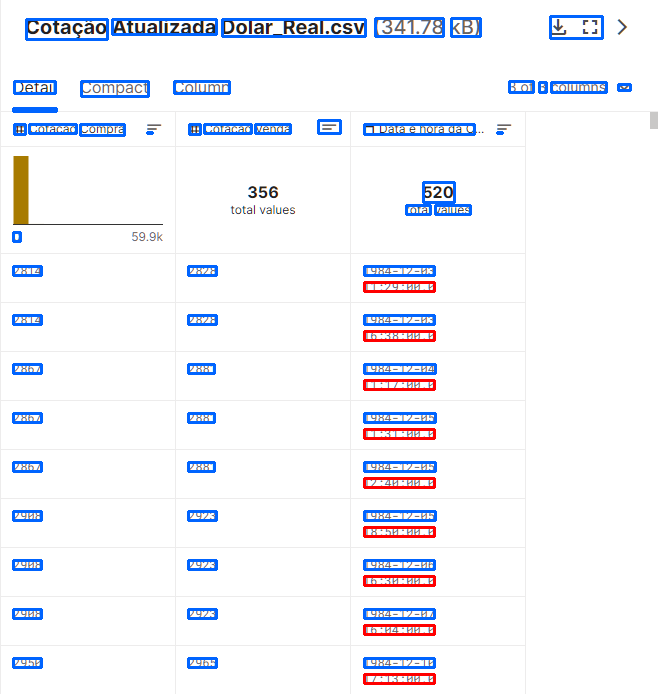

In [ ]:
import re
min_conf = 25
hours = []
config_tesseract = "--tessdata-dir tessdata"
pattern_hour = '([01]?[0-9]|2[0-3]):[0-5][0-9](:[0-5][0-9])?'

img = cv2.imread('/content/text-recognize/Atividades/Aula4_cotacao.png')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
result = pytesseract.image_to_data(rgb, config=config_tesseract, lang="eng", output_type=Output.DICT)

img_copia = rgb.copy()
for i in range(0, len(result['text'])):
  confidence = int(result['conf'][i])
  if confidence > min_conf:
    text = result['text'][i]
    if re.match(pattern_hour, text):
      x, y, img = bbox(result, img_copia, (0,0,255))
      hours.append(text)
    else:
      x, y, img_copia = bbox(result, img_copia)
cv2_imshow(img_copia)

Natural Scenarios

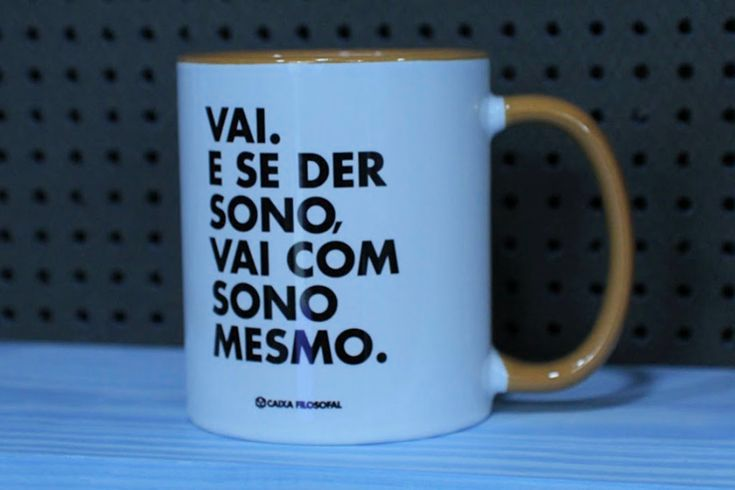

In [ ]:
img = cv2.imread("/content/text-recognize/Imagens/Aula4-caneca2.jpg")
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb);

In [ ]:
config_tesseract = "--tessdata-dir tessdata --psm 6"

In [ ]:
min_conf = 40 #@param {type: 'slider', min: 0, max: 100}

In [ ]:
result = pytesseract.image_to_data(rgb, config=config_tesseract, lang="por", output_type=Output.DICT)
result

{'level': [1,
  2,
  3,
  4,
  5,
  5,
  3,
  4,
  5,
  5,
  5,
  3,
  4,
  5,
  3,
  4,
  5,
  5,
  3,
  4,
  5,
  3,
  4,
  5,
  5],
 'page_num': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 'block_num': [0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 'par_num': [0,
  0,
  1,
  1,
  1,
  1,
  2,
  2,
  2,
  2,
  2,
  3,
  3,
  3,
  4,
  4,
  4,
  4,
  5,
  5,
  5,
  6,
  6,
  6,
  6],
 'line_num': [0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1],
 'word_num': [0,
  0,
  0,
  0,
  1,
  2,
  0,
  0,
  1,
  2,
  3,
  0,
  0,
  1,
  0,
  0,
  1,
  2,
  0,
  0,
  1,
  0,
  0,
  1,
  2],
 'left': [0,
  206,
  206,
  206,
  206,
  584,
  209,
  209,
  209,
  237,
  299,
  210,
  210,
  210,
  210,
  210,
  210,
  287,
  213,
  213,
  213,
  214,
  214,
  214,
 

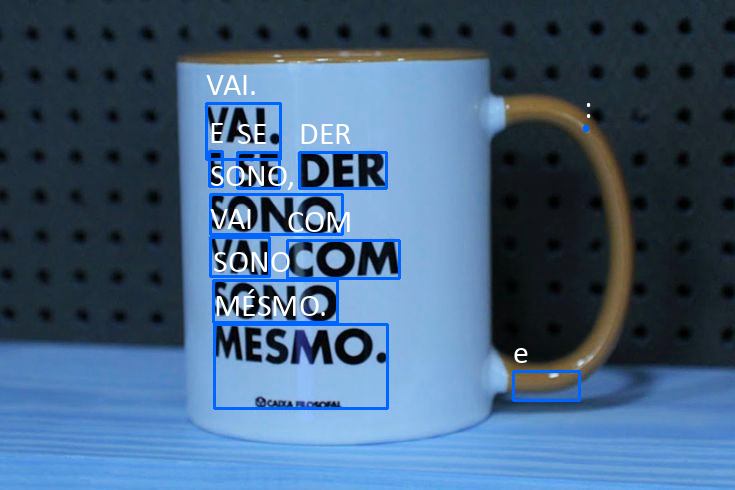

In [ ]:
img_copia = rgb.copy()

for i in range(0, len(result['text'])):
  confidence = int(result['conf'][i])
  
  if confidence > min_conf:
    x, y, img = bbox(result, img_copia)
    text = result['text'][i]
    img_copia = write_text(text, x, y, img_copia, font)
cv2_imshow(img_copia)

False positives

In [ ]:
import pandas as pd
pd.DataFrame([result['text'],result['conf']])

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,,,,,VAI.,:,,,E,SE,...,,VAI,COM,,,SONO,,,MÉSMO.,e
1,-1,-1,-1,-1,85,63,-1,-1,56,56,...,-1,48,90,-1,-1,89,-1,-1,60,54


As we can see, if we increase the confidence level it will not help this problem.

One alternative could be to remove single characters that produce false positive:

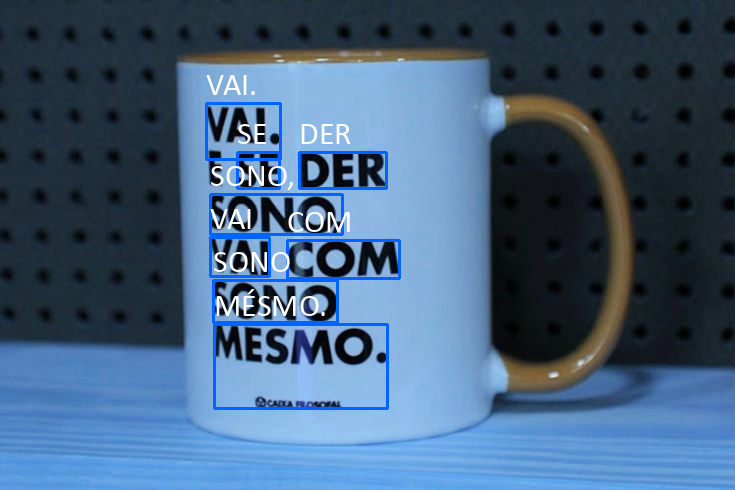

In [ ]:
img_copia = rgb.copy()

for i in range(0, len(result['text'])):
  confidence = int(result['conf'][i])
  
  if confidence > min_conf:
    
    text = result['text'][i]
    
    if not text.isspace() and len(text) > 1:
      
      x, y, img = bbox(result, img_copia)
      img_copia = write_text(text, x, y, img_copia, font)

cv2_imshow(img_copia)

But it eliminated also "E". This is not the best way to pre-process, but it is a matter for another course.